# Q1

### a)

Since $\newcommand{\E}{\mathbb{E}}\newcommand{\V}{\text{Var}}\overline W=2p(1-p)+(1-p)^2=1-p^2$,\begin{align*}
  \E(\Delta p_{selection})=\frac{p(1-p)}{2}\frac{d}{dp}\log\overline W=\frac{p(1-p)}{2}\frac{-2p}{1-p^2}=-\frac{p^2}{1+p}.
\end{align*}This change is negative, which makes sense given that the relative fitness of homozygous carriers of $a$ is $0$.

### b)

Since there are no mutations from $a$ to $A$, the expected change is entirely driven by mutations from $A$ to $a$. Thus, $\E(\Delta p_{mutation})=\mu(1-p)$. To find $\tilde p$, we have\begin{align*}
  &0=\E(\Delta p_{selection})+\E(\Delta p_{mutation})=-\frac{p^2}{1+p}+\mu(1-p)\\
  \implies&\mu(1-p)(1+p)=p^2\implies\mu=p^2(\mu+1)\implies\tilde p=\sqrt{\frac{\mu}{\mu+1}}
\end{align*}since $\tilde p$ cannot be negative.

### c)

The plots below use the logarithmic and non-logarithmic scales respectively. The first plot shows that the simulated value is less than the calculated value for small mutation rates (i.e., $<10^{-3}$), while the second plot shows that the simulated value is greater than the calculated value for large mutation rates (i.e., close to $10^{-1}$). Since these findings suggest that the equilibrium in the allele frequency only holds for a limited range of mutation rates, the differences are consequential for real populations, which can have allelic mutation rates outside this range.

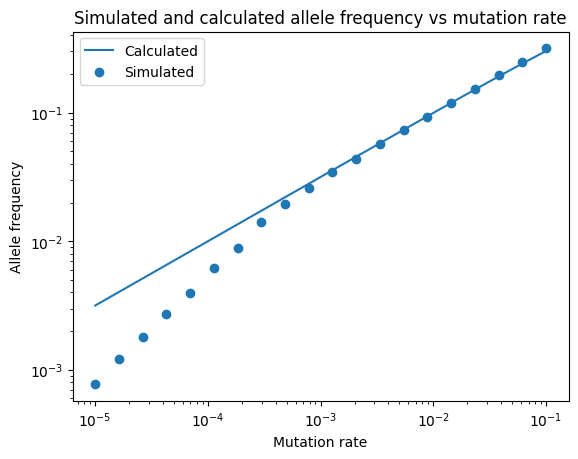

In [ ]:
import matplotlib.pyplot as plt, numpy as np

class WrightFisher:
  mu: float
  N: int

  def __init__(self, mu: float, N: int, s: float):
    self.mu = mu
    self.N = N

  def next_generation(self, allele_frequencies: np.ndarray) -> np.ndarray:
    # Selection
    expected_frequency = allele_frequencies - allele_frequencies**2 / \
      (allele_frequencies + 1)
    # Mutation
    num_carriers_before = np.random.binomial(2 * self.N, expected_frequency)
    num_A_to_a = np.random.binomial(2 * self.N - num_carriers_before, self.mu)
    num_carriers = num_carriers_before + num_A_to_a
    return num_carriers / (2 * self.N)

def simulate(g, mu, N, s):
  lst = []
  for m in mu:
    model = WrightFisher(m, N, s)
    f = np.ones(N) / (2 * N)
    for _ in range(g): f = model.next_generation(f)
    lst.append(np.mean(f))
  return lst

def plot(g, mu, N, s, log):
  p_bar = simulate(g, mu, N, s)
  plt.plot(mu, np.sqrt(mu / (mu + 1))); plt.scatter(mu, p_bar)
  if log: plt.xscale('log'); plt.yscale('log')
  plt.title('Simulated and calculated allele frequency vs mutation rate')
  plt.xlabel('Mutation rate'); plt.ylabel('Allele frequency')
  plt.legend(['Calculated', 'Simulated'])
  plt.show()

plot(100, np.logspace(-5, -1, 20), 1000, -0.1, True)

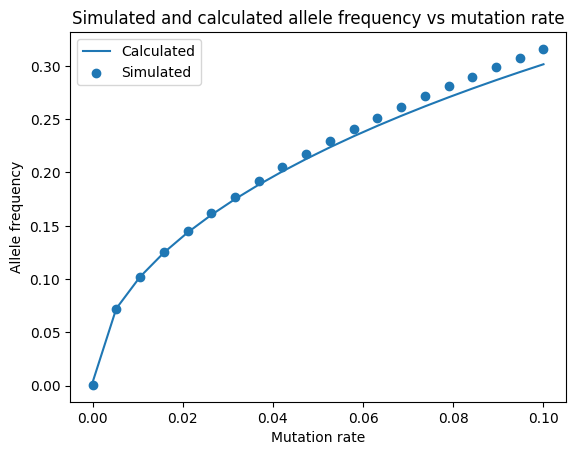

In [ ]:
plot(100, np.linspace(10**-5, 10**-1, 20), 1000, -0.1, False)

### d)

Define $N_a$ as the number of $a$ alleles after the bottleneck. Notice that there are $2N$ alleles and $N_a\sim\text{Bin}(2N,p_0)$. Then,\begin{align*}
  \E(p_1)&=\E(\frac{N_a}{2N})=\frac{1}{2N}\E(N_a)=p_0\\
  \V(p_1)&=\V(\frac{N_a}{2N})=\frac{1}{4N^2}\V(N_a)=\frac{p_0(1-p_0)}{2N}.
\end{align*}

### e)

The expected fraction of individuals who are homozygous for $a$ in the first generation is $p_1^2$. Since $\V(X)=\E(X^2)-\E(X)^2$ for any random variable $X$,\begin{align*}
  \E(p_1^2)=\V(p_1)+\E(p_1)^2=\frac{p_0(1-p_0)}{2N}+p_0^2.
\end{align*}

### f)

Define $M_a$ as the number of $a$ alleles in the second generation. Notice that there are $2N$ alleles, $M_a\sim\text{Bin}(2N,p_1)$, and the expected fraction of individuals who are homozygous for $a$ in the second generation is $p_2^2$. By the laws of total expectation and variance,\begin{align*}
  \E(p_2|p_1)&=\E(\frac{M_a}{2N}|p_1)=\frac{1}{2N}\E(M_a|p_1)=p_1\\
  \E(p_2)&=\E(\E(p_2|p_1))=\E(p_1)=p_0\\
  \V(p_2|p_1)&=\V(\frac{M_a}{2N}|p_1)=\frac{1}{4N^2}\V(M_a)=\frac{p_1(1-p_1)}{2N}\\
  \E(\V(p_2|p_1))&=\frac{1}{2N}(\E(p_1)-\E(p_1^2))=\frac{1}{2N}(p_0-\frac{p_0(1-p_0)}{2N}-p_0^2)\\
  \V(\E(p_2|p_1))&=\V(p_1)=\frac{p_0(1-p_0)}{2N}\\
  \V(p_2)&=\E(\V(p_2|p_1))+\V(\E(p_2|p_1))\\
  &=\frac{1}{2N}(p_0-\frac{p_0(1-p_0)}{2N}-p_0^2)+\frac{p_0(1-p_0)}{2N}\\
  &=p_0(1-p_0)(\frac{1}{N}-\frac{1}{4N^2})\\
  \E(p_2^2)&=\V(p_2)+\E(p_2)^2=p_0(1-p_0)(\frac{1}{N}-\frac{1}{4N^2})+p_0^2.
\end{align*}